In [2]:
import os
from PIL import Image, ImageFilter
import imghdr
import cv2
import skimage.feature as feature

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from skimage.feature import local_binary_pattern


In [3]:
folder_dir_fakes = "./fake"
folder_dir_reals = "./real"

#Noise Detection

In [14]:
real_images = []
fake_images = []
hue_mean = []
saturation_mean = []
intensity_mean = []
hue_std = []
saturation_std = []
intensity_std = []

for image in os.listdir(folder_dir_fakes):
        fake_images.append(image)
        
        image = cv2.imread(os.path.join(folder_dir_fakes, image))
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        _hue, _saturation, _intensity = cv2.split(hsv_image)

        hue_mean.append(np.mean(_hue))
        hue_std.append(np.std(_hue))

        saturation_mean.append(np.mean(_saturation))
        saturation_std.append(np.std(_saturation))

        intensity_mean.append(np.mean(_intensity))
        intensity_std.append(np.std(_intensity))


for image in os.listdir(folder_dir_reals):
        real_images.append(image)
        
        image = cv2.imread(os.path.join(folder_dir_reals, image))
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        _hue, _saturation, _intensity = cv2.split(hsv_image)

        hue_mean.append(np.mean(_hue))
        hue_std.append(np.std(_hue))

        saturation_mean.append(np.mean(_saturation))
        saturation_std.append(np.std(_saturation))

        intensity_mean.append(np.mean(_intensity))
        intensity_std.append(np.std(_intensity))


In [15]:
scale= StandardScaler()
_hue_mean = np.array(hue_mean).reshape(-1, 1)
_saturation_mean = np.array(saturation_mean).reshape(-1, 1)
_intensity_mean = np.array(intensity_mean).reshape(-1, 1)

_hue_std = np.array(hue_std).reshape(-1, 1)
_saturation_std = np.array(saturation_std).reshape(-1, 1)
_intensity_std = np.array(intensity_std).reshape(-1, 1)

_hue_mean = scale.fit_transform(_hue_mean)
_saturation_mean = scale.fit_transform(_saturation_mean)
_intensity_mean = scale.fit_transform(_intensity_mean)

_hue_std = scale.fit_transform(_hue_std)
_saturation_std = scale.fit_transform(_saturation_std)
_intensity_std = scale.fit_transform(_intensity_std)


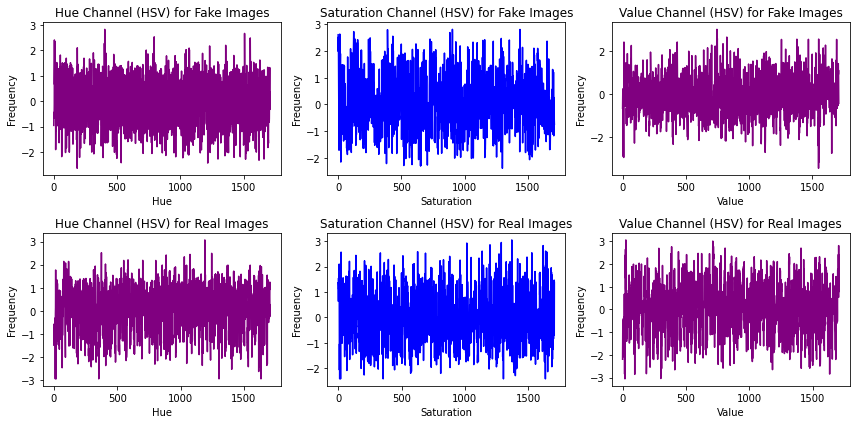

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.plot(_hue_mean[:len(fake_images)], color='purple')
plt.title('Hue Channel (HSV) for Fake Images')
plt.xlabel('Hue')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.plot(_saturation_mean[:len(fake_images)], color='blue')
plt.title('Saturation Channel (HSV) for Fake Images')
plt.xlabel('Saturation')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.plot(_intensity_mean[:len(fake_images)], color='purple')
plt.title('Value Channel (HSV) for Fake Images')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.plot(_hue_mean[len(fake_images):], color='purple')
plt.title('Hue Channel (HSV) for Real Images')
plt.xlabel('Hue')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.plot(_saturation_mean[len(fake_images):], color='blue')
plt.title('Saturation Channel (HSV) for Real Images')
plt.xlabel('Saturation')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
plt.plot(_intensity_mean[len(fake_images):], color='purple')
plt.title('Value Channel (HSV) for Real Images')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

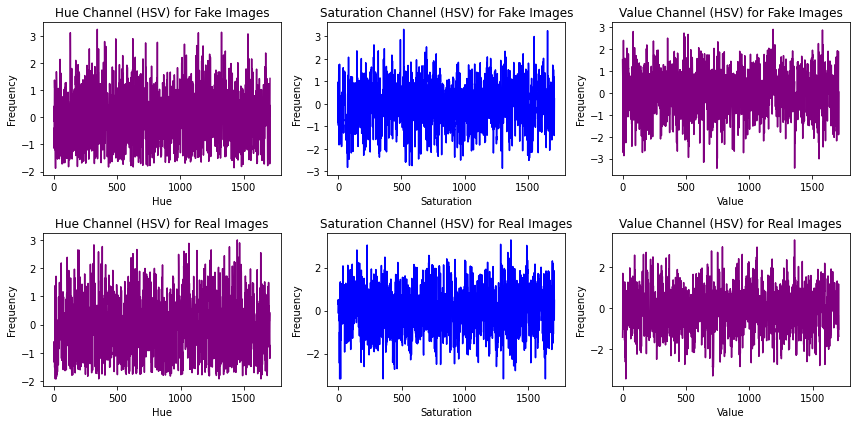

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.plot(_hue_std[:len(fake_images)], color='purple')
plt.title('Hue Channel (HSV) for Fake Images')
plt.xlabel('Hue')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.plot(_saturation_std[:len(fake_images)], color='blue')
plt.title('Saturation Channel (HSV) for Fake Images')
plt.xlabel('Saturation')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.plot(_intensity_std[:len(fake_images)], color='purple')
plt.title('Value Channel (HSV) for Fake Images')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.plot(_hue_std[len(fake_images):], color='purple')
plt.title('Hue Channel (HSV) for Real Images')
plt.xlabel('Hue')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.plot(_saturation_std[len(fake_images):], color='blue')
plt.title('Saturation Channel (HSV) for Real Images')
plt.xlabel('Saturation')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
plt.plot(_intensity_std[len(fake_images):], color='purple')
plt.title('Value Channel (HSV) for Real Images')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Blurriness

In [17]:
def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv2.Laplacian(image, cv2.CV_64F).var()

In [18]:
threshold = 100.0
blurriness = []
laplacian_var = []

for image in os.listdir(folder_dir_fakes):
      image = cv2.imread(os.path.join(folder_dir_fakes, image))
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      fm = variance_of_laplacian(gray)

      # if the focus measure is less than the supplied threshold,
      # then the image should be considered "blurry"
      if fm < threshold:
        text = "Blurry"
        blurriness.append(1)
      else:
        text = "Not Blurry"
        blurriness.append(0)
      laplacian_var.append(fm)



for image in os.listdir(folder_dir_reals):
      image = cv2.imread(os.path.join(folder_dir_reals, image))
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      fm = variance_of_laplacian(gray)

      # if the focus measure is less than the supplied threshold,
      # then the image should be considered "blurry"
      if fm < threshold:
        text = "Blurry"
        blurriness.append(1)
      else:
        text = "Not Blurry"
        blurriness.append(0)
      laplacian_var.append(fm)
  

In [20]:
_laplacian_var = np.array(laplacian_var).reshape(-1, 1)
_laplacian_var = scale.fit_transform(_laplacian_var)

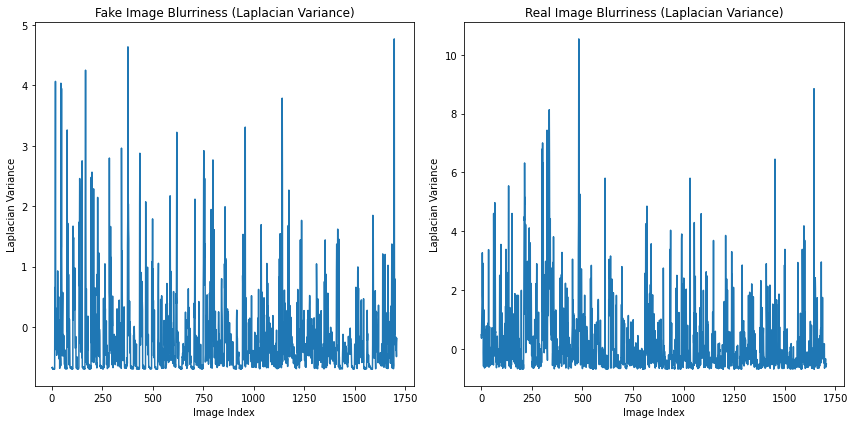

In [21]:
fake = _laplacian_var[:len(fake_images)]
real = _laplacian_var[len(fake_images):]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fake)
plt.xlabel('Image Index')
plt.ylabel('Laplacian Variance')
plt.title('Fake Image Blurriness (Laplacian Variance)')

plt.subplot(1, 2, 2)
plt.plot(real)
plt.xlabel('Image Index')
plt.ylabel('Laplacian Variance')
plt.title('Real Image Blurriness (Laplacian Variance)')

plt.tight_layout()
plt.show()

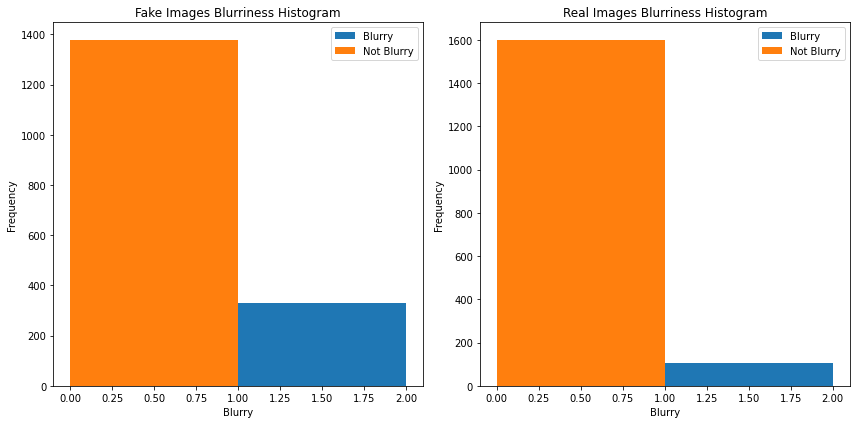

In [23]:
fake = blurriness[:len(fake_images)]
real = blurriness[len(fake_images):]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
blurry_fake = [is_blurry for is_blurry in fake if is_blurry]
non_blurry_fake = [is_blurry for is_blurry in fake if not is_blurry]
plt.hist(blurry_fake, bins=2, range=[0, 2], label='Blurry')
plt.hist(non_blurry_fake, bins=2, range=[0, 2], label='Not Blurry')
plt.xlabel('Blurry')
plt.ylabel('Frequency')
plt.title('Fake Images Blurriness Histogram')
plt.legend()

plt.subplot(1, 2, 2)
blurry_real = [is_blurry for is_blurry in real if is_blurry]
non_blurry_real = [is_blurry for is_blurry in real if not is_blurry]
plt.hist(blurry_real, bins=2, range=[0, 2], label='Blurry')
plt.hist(non_blurry_real, bins=2, range=[0, 2], label='Not Blurry')
plt.xlabel('Blurry')
plt.ylabel('Frequency')
plt.title('Real Images Blurriness Histogram')
plt.legend()

plt.tight_layout()
plt.show()

#Canny Edge Detection

In [30]:
edges = []
edges_count = []
edges_mean = []
edges_std = []

for image in os.listdir(folder_dir_fakes):
      image = cv2.imread(os.path.join(folder_dir_fakes, image))
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      edge = cv2.Canny(gray,100,200)
      edge_count = np.count_nonzero(edge)
      edges_count.append(edge_count)
      edge_mean = np.mean(edge)
      edges_mean.append(edge_mean)
      edge_std = np.std(edge)
      edges_std.append(edge_std)
      edges.append(edge)

for image in os.listdir(folder_dir_reals):
      image = cv2.imread(os.path.join(folder_dir_reals, image))
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      edge = cv2.Canny(gray,100,200)
      edge_count = np.count_nonzero(edge)
      edges_count.append(edge_count)
      edge_mean = np.mean(edge)
      edges_mean.append(edge_mean)
      edge_std = np.std(edge)
      edges_std.append(edge_std)
      edges.append(edge)
      

In [31]:
_edges_count = (edges_count - np.min(edges_count)) / (np.max(edges_count) - np.min(edges_count))
_edges_mean = np.array(edges_mean).reshape(-1, 1)
_edges_std = np.array(edges_std).reshape(-1, 1)

_edges_mean = scale.fit_transform(_edges_mean)
_edges_std = scale.fit_transform(_edges_std)

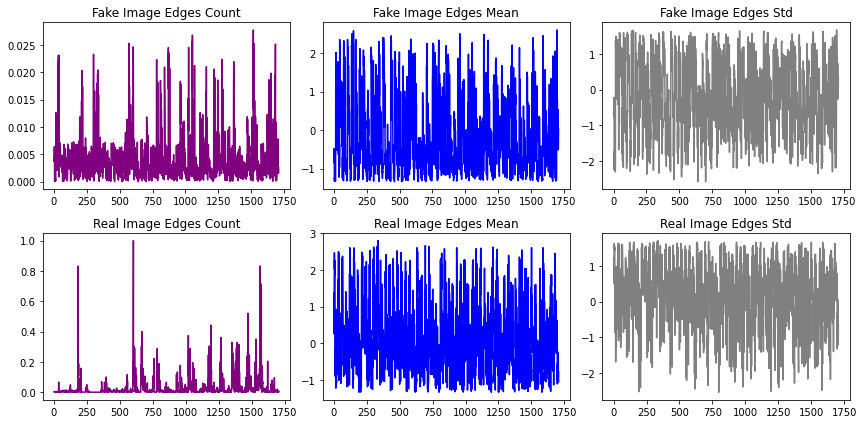

In [32]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.plot(_edges_count[:len(fake_images)], color='purple')
plt.title('Fake Image Edges Count')

plt.subplot(2, 3, 2)
plt.plot(_edges_mean[:len(fake_images)], color='blue')
plt.title('Fake Image Edges Mean')

plt.subplot(2, 3, 3)
plt.plot(_edges_std[:len(fake_images)], color='gray')
plt.title('Fake Image Edges Std')

plt.subplot(2, 3, 4)
plt.plot(_edges_count[len(fake_images):], color='purple')
plt.title('Real Image Edges Count')

plt.subplot(2, 3, 5)
plt.plot(_edges_mean[len(fake_images):], color='blue')
plt.title('Real Image Edges Mean')

plt.subplot(2, 3, 6)
plt.plot(_edges_std[len(fake_images):], color='grey')
plt.title('Real Image Edges Std')

plt.tight_layout()
plt.show()

150400011_fake_dall.e_jungle_1.jpg


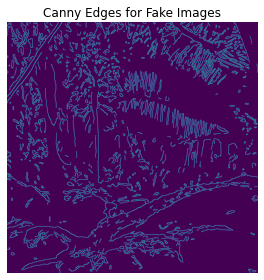

In [33]:
print(fake_images[0])
plt.imshow(edges[0])
plt.title('Canny Edges for Fake Images'), plt.axis('off')
plt.tight_layout()
plt.show()

150400011_real_none_jungle_1.jpg


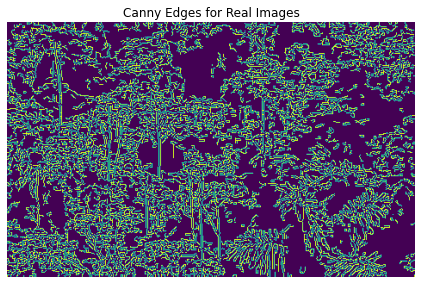

In [34]:
print(real_images[0])
plt.imshow(edges[len(fake_images)])
plt.title('Canny Edges for Real Images'), plt.axis('off')
plt.tight_layout()
plt.show()

#Lightning & Color Distribution 

In [35]:
lightness_mean = []
green_magenta_mean = []
blue_yellow_mean = []
lightness_std = []
green_magenta_std = []
blue_yellow_std = []

for image in os.listdir(folder_dir_fakes):
        image = cv2.imread(os.path.join(folder_dir_fakes, image))
        lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        _lightness, _green_magenta, _blue_yellow = cv2.split(lab_image)
        
        lightness_mean.append(np.mean(_lightness))
        lightness_std.append(np.std(_lightness))

        green_magenta_mean.append(np.mean(_green_magenta))
        green_magenta_std.append(np.std(_green_magenta))

        blue_yellow_mean.append(np.mean(_blue_yellow))
        blue_yellow_std.append(np.std(_blue_yellow))


for image in os.listdir(folder_dir_reals):
        image = cv2.imread(os.path.join(folder_dir_reals, image))
        lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        _lightness, _green_magenta, _blue_yellow = cv2.split(lab_image)
        
        lightness_mean.append(np.mean(_lightness))
        lightness_std.append(np.std(_lightness))

        green_magenta_mean.append(np.mean(_green_magenta))
        green_magenta_std.append(np.std(_green_magenta))

        blue_yellow_mean.append(np.mean(_blue_yellow))
        blue_yellow_std.append(np.std(_blue_yellow))

In [36]:
_lightness_mean = np.array(lightness_mean).reshape(-1, 1)
_green_magenta_mean = np.array(green_magenta_mean).reshape(-1, 1)
_blue_yellow_mean = np.array(blue_yellow_mean).reshape(-1, 1)

_lightness_std = np.array(lightness_std).reshape(-1, 1)
_green_magenta_std = np.array(green_magenta_std).reshape(-1, 1)
_blue_yellow_std = np.array(blue_yellow_std).reshape(-1, 1)

_lightness_mean = scale.fit_transform(_lightness_mean)
_green_magenta_mean = scale.fit_transform(_green_magenta_mean)
_blue_yellow_mean = scale.fit_transform(_blue_yellow_mean)

_lightness_std = scale.fit_transform(_lightness_std)
_green_magenta_std = scale.fit_transform(_green_magenta_std)
_blue_yellow_std = scale.fit_transform(_blue_yellow_std)


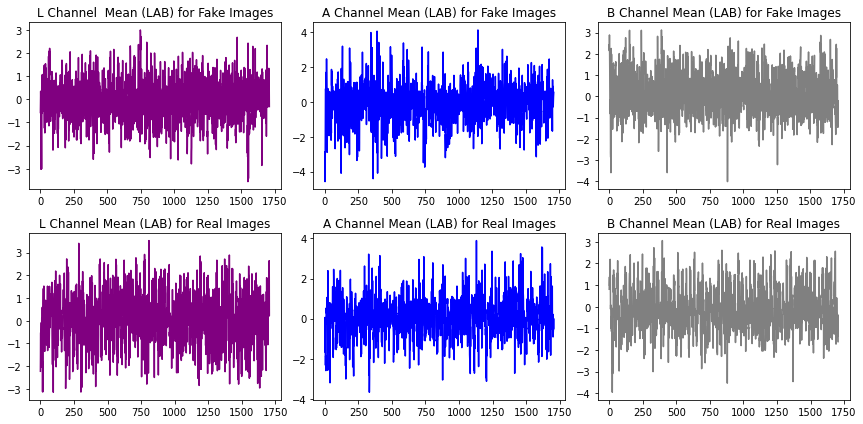

In [37]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.plot(_lightness_mean[:len(fake_images)], color='purple')
plt.title('L Channel  Mean (LAB) for Fake Images')

plt.subplot(2, 3, 2)
plt.plot(_green_magenta_mean[:len(fake_images)], color='blue')
plt.title('A Channel Mean (LAB) for Fake Images')

plt.subplot(2, 3, 3)
plt.plot(_blue_yellow_mean[:len(fake_images)], color='grey')
plt.title('B Channel Mean (LAB) for Fake Images')

plt.subplot(2, 3, 4)
plt.plot(_lightness_mean[len(fake_images):], color='purple')
plt.title('L Channel Mean (LAB) for Real Images')

plt.subplot(2, 3, 5)
plt.plot(_green_magenta_mean[len(fake_images):], color='blue')
plt.title('A Channel Mean (LAB) for Real Images')

plt.subplot(2, 3, 6)
plt.plot(_blue_yellow_mean[len(fake_images):], color='grey')
plt.title('B Channel Mean (LAB) for Real Images')

plt.tight_layout()
plt.show()

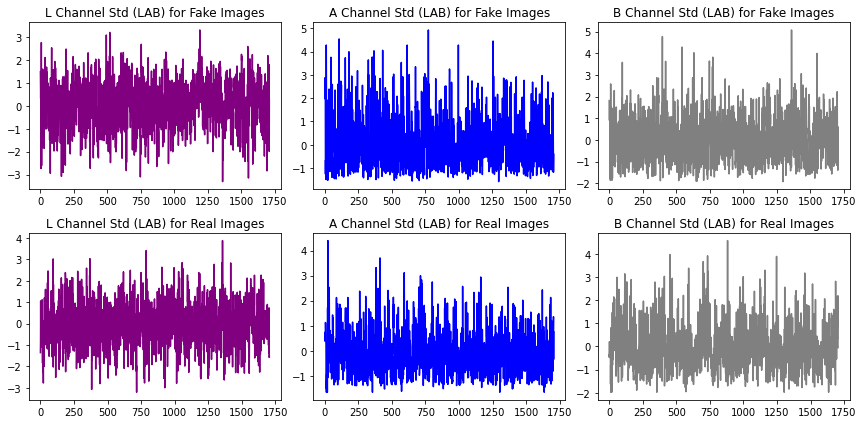

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.plot(_lightness_std[:len(fake_images)], color='purple')
plt.title('L Channel Std (LAB) for Fake Images')

plt.subplot(2, 3, 2)
plt.plot(_green_magenta_std[:len(fake_images)], color='blue')
plt.title('A Channel Std (LAB) for Fake Images')

plt.subplot(2, 3, 3)
plt.plot(_blue_yellow_std[:len(fake_images)], color='grey')
plt.title('B Channel Std (LAB) for Fake Images')

plt.subplot(2, 3, 4)
plt.plot(_lightness_std[len(fake_images):], color='purple')
plt.title('L Channel Std (LAB) for Real Images')

plt.subplot(2, 3, 5)
plt.plot(_green_magenta_std[len(fake_images):], color='blue')
plt.title('A Channel Std (LAB) for Real Images')

plt.subplot(2, 3, 6)
plt.plot(_blue_yellow_std[len(fake_images):], color='grey')
plt.title('B Channel Std (LAB) for Real Images')


plt.tight_layout()
plt.show()

In [40]:
luminance_mean = []
cr_mean = []
cb_mean = []
luminance_std = []
cr_std = []
cb_std = []

for image in os.listdir(folder_dir_fakes):
        image = cv2.imread(os.path.join(folder_dir_fakes, image))
        ycrcb_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
        _luminance, _cr, _cb = cv2.split(ycrcb_image)
        luminance_mean.append(np.mean(_luminance))
        luminance_std.append(np.std(_luminance))

        cr_mean.append(np.mean(_cr))
        cr_std.append(np.std(_cr))

        cb_mean.append(np.mean(_cb))
        cb_std.append(np.std(_cb))



for image in os.listdir(folder_dir_reals):
        image = cv2.imread(os.path.join(folder_dir_reals, image))
        ycrcb_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
        _luminance, _cr, _cb = cv2.split(ycrcb_image)
        luminance_mean.append(np.mean(_luminance))
        luminance_std.append(np.std(_luminance))

        cr_mean.append(np.mean(_cr))
        cr_std.append(np.std(_cr))

        cb_mean.append(np.mean(_cb))
        cb_std.append(np.std(_cb))

In [41]:
_luminance_mean = np.array(luminance_mean).reshape(-1, 1)
_cr_mean = np.array(cr_mean).reshape(-1, 1)
_cb_mean = np.array(cb_mean).reshape(-1, 1)

_luminance_std = np.array(luminance_std).reshape(-1, 1)
_cr_std = np.array(cr_std).reshape(-1, 1)
_cb_std = np.array(cb_std).reshape(-1, 1)

_luminance_mean = scale.fit_transform(_luminance_mean)
_cr_mean = scale.fit_transform(_cr_mean)
_cb_mean = scale.fit_transform(_cb_mean)

_luminance_std = scale.fit_transform(_luminance_std)
_cr_std = scale.fit_transform(_cr_std)
_cb_std = scale.fit_transform(_cb_std)


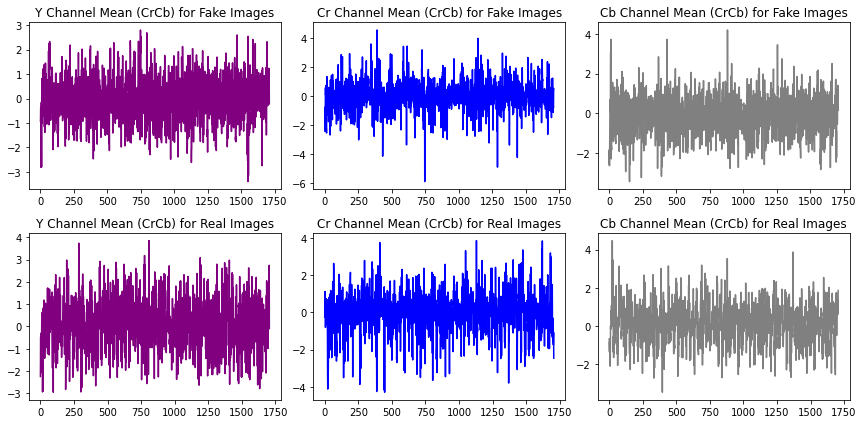

In [42]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.plot(_luminance_mean[:len(fake_images)], color='purple')
plt.title('Y Channel Mean (CrCb) for Fake Images')

plt.subplot(2, 3, 2)
plt.plot(_cr_mean[:len(fake_images)], color='blue')
plt.title('Cr Channel Mean (CrCb) for Fake Images')

plt.subplot(2, 3, 3)
plt.plot(_cb_mean[:len(fake_images)], color='grey')
plt.title('Cb Channel Mean (CrCb) for Fake Images')

plt.subplot(2, 3, 4)
plt.plot(_luminance_mean[len(fake_images):], color='purple')
plt.title('Y Channel Mean (CrCb) for Real Images')

plt.subplot(2, 3, 5)
plt.plot(_cr_mean[len(fake_images):], color='blue')
plt.title('Cr Channel Mean (CrCb) for Real Images')

plt.subplot(2, 3, 6)
plt.plot(_cb_mean[len(fake_images):], color='grey')
plt.title('Cb Channel Mean (CrCb) for Real Images')

plt.tight_layout()
plt.show()

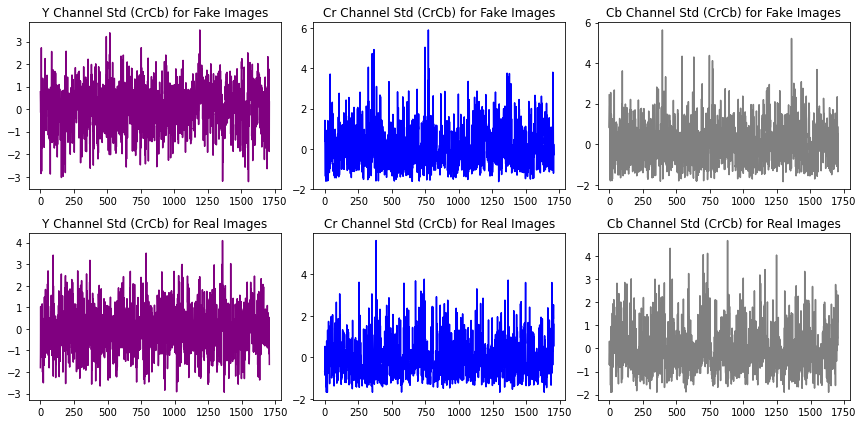

In [43]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.plot(_luminance_std[:len(fake_images)], color='purple')
plt.title('Y Channel Std (CrCb) for Fake Images')

plt.subplot(2, 3, 2)
plt.plot(_cr_std[:len(fake_images)], color='blue')
plt.title('Cr Channel Std (CrCb) for Fake Images')

plt.subplot(2, 3, 3)
plt.plot(_cb_std[:len(fake_images)], color='grey')
plt.title('Cb Channel Std (CrCb) for Fake Images')

plt.subplot(2, 3, 4)
plt.plot(_luminance_std[len(fake_images):], color='purple')
plt.title('Y Channel Std (CrCb) for Real Images')

plt.subplot(2, 3, 5)
plt.plot(_cr_std[len(fake_images):], color='blue')
plt.title('Cr Channel Std (CrCb) for Real Images')

plt.subplot(2, 3, 6)
plt.plot(_cb_std[len(fake_images):], color='grey')
plt.title('Cb Channel Std (CrCb) for Real Images')

plt.tight_layout()
plt.show()

In [44]:
red_mean = []
green_mean = []
blue_mean = []
red_std = []
green_std = []
blue_std = []

for image in os.listdir(folder_dir_fakes):
        image = cv2.imread(os.path.join(folder_dir_fakes, image))
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        _red, _green, _blue = cv2.split(rgb_image)

        red_mean.append(np.mean(_red))
        red_std.append(np.std(_red))

        green_mean.append(np.mean(_green))
        green_std.append(np.std(_green))

        blue_mean.append(np.mean(_blue))
        blue_std.append(np.std(_blue))

for image in os.listdir(folder_dir_reals):
        image = cv2.imread(os.path.join(folder_dir_reals, image))
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        _red, _green, _blue = cv2.split(rgb_image)

        red_mean.append(np.mean(_red))
        red_std.append(np.std(_red))

        green_mean.append(np.mean(_green))
        green_std.append(np.std(_green))

        blue_mean.append(np.mean(_blue))
        blue_std.append(np.std(_blue))

In [45]:
_red_mean = np.array(red_mean).reshape(-1, 1)
_green_mean = np.array(green_mean).reshape(-1, 1)
_blue_mean = np.array(blue_mean).reshape(-1, 1)

_red_std = np.array(red_std).reshape(-1, 1)
_green_std = np.array(green_std).reshape(-1, 1)
_blue_std = np.array(blue_std).reshape(-1, 1)

_red_mean = scale.fit_transform(_red_mean)
_green_mean = scale.fit_transform(_green_mean)
_blue_mean = scale.fit_transform(_blue_mean)

_red_std = scale.fit_transform(_red_std)
_green_std = scale.fit_transform(_green_std)
_blue_std = scale.fit_transform(_blue_std)


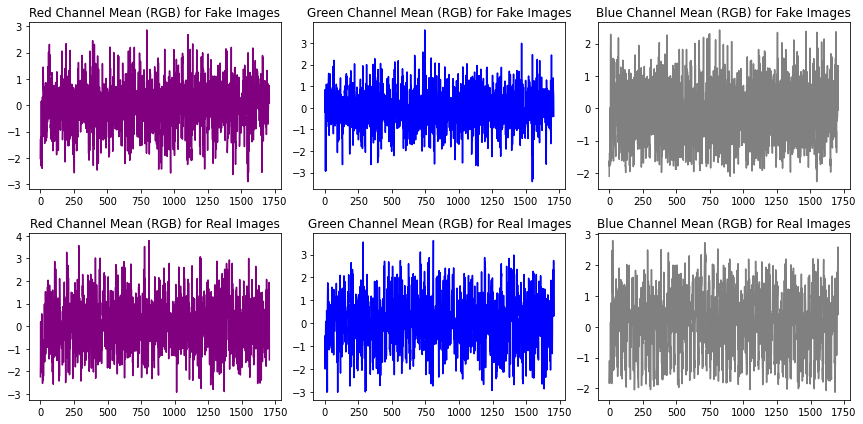

In [46]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.plot(_red_mean[:len(fake_images)], color='purple')
plt.title('Red Channel Mean (RGB) for Fake Images')

plt.subplot(2, 3, 2)
plt.plot(_green_mean[:len(fake_images)], color='blue')
plt.title('Green Channel Mean (RGB) for Fake Images')

plt.subplot(2, 3, 3)
plt.plot(_blue_mean[:len(fake_images)], color='grey')
plt.title('Blue Channel Mean (RGB) for Fake Images')

plt.subplot(2, 3, 4)
plt.plot(_red_mean[len(fake_images):], color='purple')
plt.title('Red Channel Mean (RGB) for Real Images')

plt.subplot(2, 3, 5)
plt.plot(_green_mean[len(fake_images):], color='blue')
plt.title('Green Channel Mean (RGB) for Real Images')

plt.subplot(2, 3, 6)
plt.plot(_blue_mean[len(fake_images):], color='grey')
plt.title('Blue Channel Mean (RGB) for Real Images')

plt.tight_layout()
plt.show()

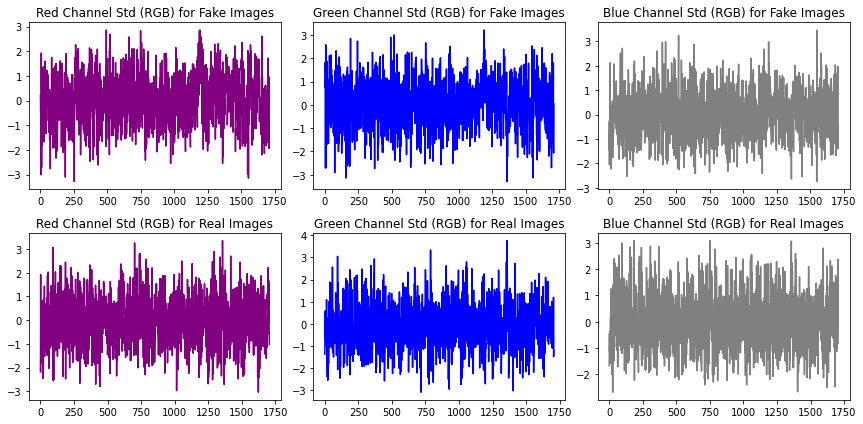

In [47]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.plot(_red_std[:len(fake_images)], color='purple')
plt.title('Red Channel Std (RGB) for Fake Images')

plt.subplot(2, 3, 2)
plt.plot(_green_std[:len(fake_images)], color='blue')
plt.title('Green Channel Std (RGB) for Fake Images')

plt.subplot(2, 3, 3)
plt.plot(_blue_std[:len(fake_images)], color='grey')
plt.title('Blue Channel Std (RGB) for Fake Images')

plt.subplot(2, 3, 4)
plt.plot(_red_std[len(fake_images):], color='purple')
plt.title('Red Channel Std (RGB) for Real Images')

plt.subplot(2, 3, 5)
plt.plot(_green_std[len(fake_images):], color='blue')
plt.title('Green Channel Std (RGB) for Real Images')

plt.subplot(2, 3, 6)
plt.plot(_blue_std[len(fake_images):], color='grey')
plt.title('Blue Channel Std (RGB) for Real Images')

plt.tight_layout()
plt.show()

#Texture (Local Binary Patterns (LBP) and Gray-Level Co-occurrence Matrix (GLCM))

In [63]:
lbp_mean = []
lbp_std = []
for image in os.listdir(folder_dir_fakes):

        image_spot = cv2.imread(os.path.join(folder_dir_fakes, image))
        gray = cv2.cvtColor(image_spot, cv2.COLOR_BGR2GRAY)

        # Extract LBP features
        lbp_radius = 3
        lbp_points = 8 * lbp_radius
        lbp = local_binary_pattern(gray, lbp_points, lbp_radius, method="uniform")
        
        lbp_mean.append(np.mean(lbp))
        lbp_std.append(np.std(lbp))

for image in os.listdir(folder_dir_reals):

        image_spot = cv2.imread(os.path.join(folder_dir_reals, image))
        gray = cv2.cvtColor(image_spot, cv2.COLOR_BGR2GRAY)
        
        # Extract LBP features
        lbp_radius = 3
        lbp_points = 8 * lbp_radius
        lbp = local_binary_pattern(gray, lbp_points, lbp_radius, method="uniform")
              
        lbp_mean.append(np.mean(lbp))
        lbp_std.append(np.std(lbp))

In [ ]:
_lbp_mean = np.array(lbp_mean).reshape(-1, 1)
_lbp_std = np.array(lbp_std).reshape(-1, 1)

_lbp_mean = scale.fit_transform(_lbp_mean)
_lbp_std = scale.fit_transform(_lbp_std)

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(lbp_mean[:len(fake_images)], color='purple')
plt.title('LBP Mean for Fake Images')

plt.subplot(2, 2, 2)
plt.plot(lbp_std[:len(fake_images)], color='blue')
plt.title('LBP Std for Fake Images')

plt.subplot(2, 2, 3)
plt.plot(lbp_mean[len(fake_images):], color='purple')
plt.title('LBP Mean for Real Images')

plt.subplot(2, 2, 4)
plt.plot(lbp_std[len(fake_images):], color='blue')
plt.title('LBP Std for Real Images')

plt.tight_layout()
plt.show()

In [48]:
contrast_mean = []
dissimilarity_mean = []
homogeneity_mean = []
energy_mean = []
correlation_mean = []
ASM_mean = []
contrast_std = []
dissimilarity_std = []
homogeneity_std = []
energy_std = []
correlation_std = []
ASM_std = []

for image in os.listdir(folder_dir_fakes):

      image_spot = cv2.imread(os.path.join(folder_dir_fakes, image))
      gray = cv2.cvtColor(image_spot, cv2.COLOR_BGR2GRAY)
    
      # Param:
      # source image
      # List of pixel pair distance offsets - here 1 in each direction
      # List of pixel pair angles in radians
      graycom = feature.graycomatrix(gray, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],levels=256, symmetric=True, normed=True)

      # Find the GLCM properties
      contrast_mean.append(np.mean(feature.graycoprops(graycom, 'contrast')))
      dissimilarity_mean.append(np.mean(feature.graycoprops(graycom, 'dissimilarity')))
      homogeneity_mean.append(np.mean(feature.graycoprops(graycom, 'homogeneity')))
      energy_mean.append(np.mean(feature.graycoprops(graycom, 'energy')))
      correlation_mean.append(np.mean(feature.graycoprops(graycom, 'correlation')))
      ASM_mean.append(np.mean(feature.graycoprops(graycom, 'ASM')))

      contrast_std.append(np.std(feature.graycoprops(graycom, 'contrast')))
      dissimilarity_std.append(np.std(feature.graycoprops(graycom, 'dissimilarity')))
      homogeneity_std.append(np.std(feature.graycoprops(graycom, 'homogeneity')))
      energy_std.append(np.std(feature.graycoprops(graycom, 'energy')))
      correlation_std.append(np.std(feature.graycoprops(graycom, 'correlation')))
      ASM_std.append(np.std(feature.graycoprops(graycom, 'ASM')))


for image in os.listdir(folder_dir_reals):

      image_spot = cv2.imread(os.path.join(folder_dir_reals, image))
      gray = cv2.cvtColor(image_spot, cv2.COLOR_BGR2GRAY)

      # Param:
      # source image
      # List of pixel pair distance offsets - here 1 in each direction
      # List of pixel pair angles in radians
      graycom = feature.graycomatrix(gray, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

      # Find the GLCM properties
      contrast_mean.append(np.mean(feature.graycoprops(graycom, 'contrast')))
      dissimilarity_mean.append(np.mean(feature.graycoprops(graycom, 'dissimilarity')))
      homogeneity_mean.append(np.mean(feature.graycoprops(graycom, 'homogeneity')))
      energy_mean.append(np.mean(feature.graycoprops(graycom, 'energy')))
      correlation_mean.append(np.mean(feature.graycoprops(graycom, 'correlation')))
      ASM_mean.append(np.mean(feature.graycoprops(graycom, 'ASM')))

      contrast_std.append(np.std(feature.graycoprops(graycom, 'contrast')))
      dissimilarity_std.append(np.std(feature.graycoprops(graycom, 'dissimilarity')))
      homogeneity_std.append(np.std(feature.graycoprops(graycom, 'homogeneity')))
      energy_std.append(np.std(feature.graycoprops(graycom, 'energy')))
      correlation_std.append(np.std(feature.graycoprops(graycom, 'correlation')))
      ASM_std.append(np.std(feature.graycoprops(graycom, 'ASM')))

In [49]:
_contrast_mean = np.array(contrast_mean).reshape(-1, 1)
_dissimilarity_mean = np.array(dissimilarity_mean).reshape(-1, 1)
_homogeneity_mean = np.array(homogeneity_mean).reshape(-1, 1)
_energy_mean = np.array(energy_mean).reshape(-1, 1)
_correlation_mean = np.array(correlation_mean).reshape(-1, 1)
_ASM_mean = np.array(ASM_mean).reshape(-1, 1)

_contrast_std = np.array(contrast_std).reshape(-1, 1)
_dissimilarity_std = np.array(dissimilarity_std).reshape(-1, 1)
_homogeneity_std = np.array(homogeneity_std).reshape(-1, 1)
_energy_std = np.array(energy_std).reshape(-1, 1)
_correlation_std = np.array(correlation_std).reshape(-1, 1)
_ASM_std = np.array(ASM_std).reshape(-1, 1)


_contrast_mean = scale.fit_transform(_contrast_mean)
_dissimilarity_mean = scale.fit_transform(_dissimilarity_mean)
_homogeneity_mean = scale.fit_transform(_homogeneity_mean)
_energy_mean = scale.fit_transform(_energy_mean)
_correlation_mean = scale.fit_transform(_correlation_mean)
_ASM_mean = scale.fit_transform(_ASM_mean)

_contrast_std = scale.fit_transform(_contrast_std)
_dissimilarity_std = scale.fit_transform(_dissimilarity_std)
_homogeneity_std = scale.fit_transform(_homogeneity_std)
_energy_std = scale.fit_transform(_energy_std)
_correlation_std = scale.fit_transform(_correlation_std)
_ASM_std = scale.fit_transform(_ASM_std)

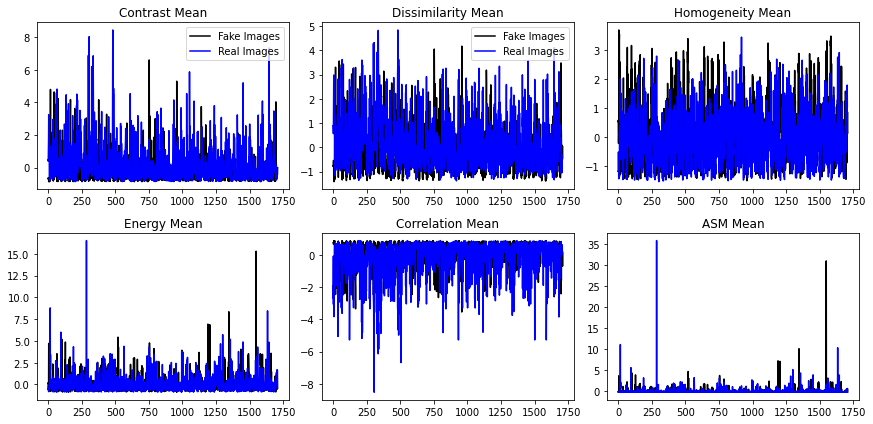

In [50]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.plot(_contrast_mean[:len(fake_images)], color='black', label='Fake Images')
plt.plot(_contrast_mean[len(fake_images):], color='blue', label='Real Images')
plt.title('Contrast Mean')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(_dissimilarity_mean[:len(fake_images)], color='black', label='Fake Images')
plt.plot(_dissimilarity_mean[len(fake_images):], color='blue', label='Real Images')
plt.title('Dissimilarity Mean')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(_homogeneity_mean[:len(fake_images)], color='black', label='Fake Images')
plt.plot(_homogeneity_mean[len(fake_images):], color='blue', label='Real Images')
plt.title('Homogeneity Mean')

plt.subplot(2, 3, 4)
plt.plot(_energy_mean[:len(fake_images)], color='black', label='Fake Images')
plt.plot(_energy_mean[len(fake_images):], color='blue', label='Real Images')
plt.title('Energy Mean')

plt.subplot(2, 3, 5)
plt.plot(_correlation_mean[:len(fake_images)], color='black', label='Fake Images')
plt.plot(_correlation_mean[len(fake_images):], color='blue', label='Real Images')
plt.title('Correlation Mean')

plt.subplot(2, 3, 6)
plt.plot(_ASM_mean[:len(fake_images)], color='black', label='Fake Images')
plt.plot(_ASM_mean[len(fake_images):], color='blue', label='Real Images')
plt.title('ASM Mean')

plt.tight_layout()
plt.show()

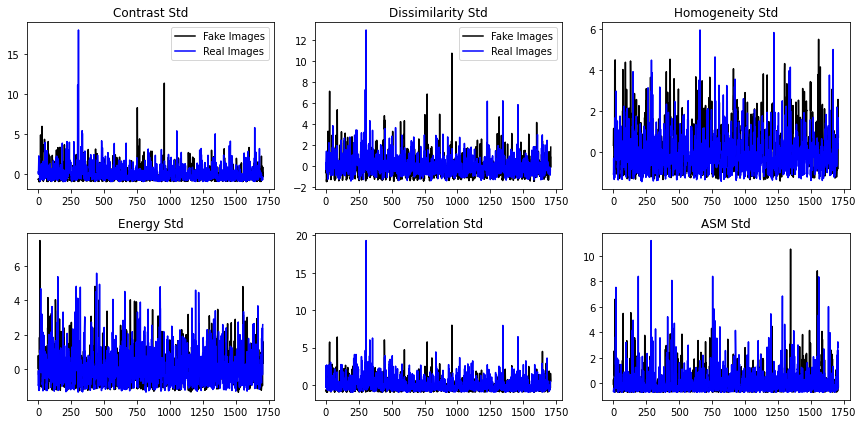

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.plot(_contrast_std[:len(fake_images)], color='black', label='Fake Images')
plt.plot(_contrast_std[len(fake_images):], color='blue', label='Real Images')
plt.title('Contrast Std')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(_dissimilarity_std[:len(fake_images)], color='black', label='Fake Images')
plt.plot(_dissimilarity_std[len(fake_images):], color='blue', label='Real Images')
plt.title('Dissimilarity Std')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(_homogeneity_std[:len(fake_images)], color='black', label='Fake Images')
plt.plot(_homogeneity_std[len(fake_images):], color='blue', label='Real Images')
plt.title('Homogeneity Std')

plt.subplot(2, 3, 4)
plt.plot(_energy_std[:len(fake_images)], color='black', label='Fake Images')
plt.plot(_energy_std[len(fake_images):], color='blue', label='Real Images')
plt.title('Energy Std')

plt.subplot(2, 3, 5)
plt.plot(_correlation_std[:len(fake_images)], color='black', label='Fake Images')
plt.plot(_correlation_std[len(fake_images):], color='blue', label='Real Images')
plt.title('Correlation Std')

plt.subplot(2, 3, 6)
plt.plot(_ASM_std[:len(fake_images)], color='black', label='Fake Images')
plt.plot(_ASM_std[len(fake_images):], color='blue', label='Real Images')
plt.title('ASM Std')

plt.tight_layout()
plt.show()

#Gray-Scale

In [53]:
fake_grayscale = []
real_grayscale = []

for image in os.listdir(folder_dir_fakes):
      im = Image.open(os.path.join(folder_dir_fakes, image))
      newsize = (300, 300)
      im = im.resize(newsize)
      grayscale = im.convert("L")
      fake_grayscale.append(grayscale)


for image in os.listdir(folder_dir_reals):
      im = Image.open(os.path.join(folder_dir_reals, image))
      newsize = (300, 300)
      im = im.resize(newsize)
      grayscale = im.convert("L")
      real_grayscale.append(grayscale)

In [54]:
gray_scale_mean = []
gray_scale_std = []

for gs in fake_grayscale:
    _gs = []
    for x, y in zip(range(300), range(300)):
        _gs.append(gs.load()[x, y])
    gray_scale_mean.append(np.mean(_gs))
    gray_scale_std.append(np.std(_gs))


for gs in real_grayscale:
    _gs = []
    for x, y in zip(range(300), range(300)):
        _gs.append(gs.load()[x, y])
    gray_scale_mean.append(np.mean(_gs))
    gray_scale_std.append(np.std(_gs))


In [55]:
_gray_scale_mean = np.array(gray_scale_mean).reshape(-1, 1)
_gray_scale_std = np.array(gray_scale_std).reshape(-1, 1)

_gray_scale_mean = scale.fit_transform(_gray_scale_mean)
_gray_scale_std = scale.fit_transform(_gray_scale_std)

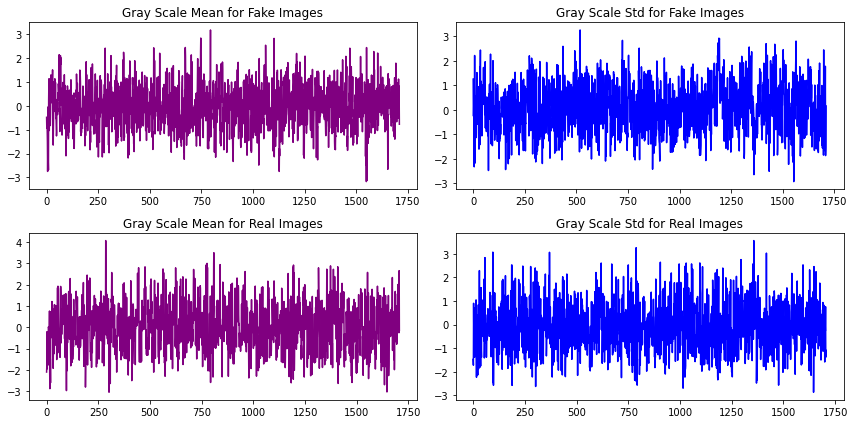

In [56]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(_gray_scale_mean[:len(fake_images)], color='purple')
plt.title('Gray Scale Mean for Fake Images')

plt.subplot(2, 2, 2)
plt.plot(_gray_scale_std[:len(fake_images)], color='blue')
plt.title('Gray Scale Std for Fake Images')

plt.subplot(2, 2, 3)
plt.plot(_gray_scale_mean[len(fake_images):], color='purple')
plt.title('Gray Scale Mean for Real Images')

plt.subplot(2, 2, 4)
plt.plot(_gray_scale_std[len(fake_images):], color='blue')
plt.title('Gray Scale Std for Real Images')

plt.tight_layout()
plt.show()

In [57]:
fake_labels = ['fake'] * len(fake_images)
real_labels = ['real'] * len(real_images)
labels = fake_labels + real_labels

In [59]:
_gray_scale_std = np.array(_gray_scale_std).reshape(-1)
_gray_scale_mean = np.array(_gray_scale_mean).reshape(-1)
_hue_mean = np.array(_hue_mean).reshape(-1)
_hue_std = np.array(_hue_std).reshape(-1)
_saturation_mean = np.array(_saturation_mean).reshape(-1)
_saturation_std = np.array(_saturation_std).reshape(-1)
_intensity_mean = np.array(_intensity_mean).reshape(-1)
_intensity_std = np.array(_intensity_std).reshape(-1)
_laplacian_var = np.array(_laplacian_var).reshape(-1)
_edges_mean = np.array(_edges_mean).reshape(-1)
_edges_std = np.array(_edges_std).reshape(-1)
_lightness_mean = np.array(_lightness_mean).reshape(-1)
_green_magenta_mean = np.array(_green_magenta_mean).reshape(-1)
_blue_yellow_mean = np.array(_blue_yellow_mean).reshape(-1)
_lightness_std = np.array(_lightness_std).reshape(-1)
_green_magenta_std = np.array(_green_magenta_std).reshape(-1)
_blue_yellow_std = np.array(_blue_yellow_std).reshape(-1)
_luminance_mean = np.array(_luminance_mean).reshape(-1)
_cr_mean = np.array(_cr_mean).reshape(-1)
_cb_mean = np.array(_cb_mean).reshape(-1)
_luminance_std = np.array(_luminance_std).reshape(-1)
_cr_std = np.array(_cr_std).reshape(-1)
_cb_std = np.array(_cb_std).reshape(-1)
_red_mean = np.array(_red_mean).reshape(-1)
_green_mean = np.array(_green_mean).reshape(-1)
_blue_mean = np.array(_blue_mean).reshape(-1)
_red_std = np.array(_red_std).reshape(-1)
_green_std = np.array(_green_std).reshape(-1)
_blue_std = np.array(_blue_std).reshape(-1)
#_lbp_mean = np.array(_lbp_mean).reshape(-1)
#_lbp_std = np.array(_lbp_std).reshape(-1)
_contrast_mean = np.array(_contrast_mean).reshape(-1)
_dissimilarity_mean = np.array(_dissimilarity_mean).reshape(-1)
_homogeneity_mean = np.array(_homogeneity_mean).reshape(-1)
_energy_mean = np.array(_energy_mean).reshape(-1)
_correlation_mean = np.array(_correlation_mean).reshape(-1)
_ASM_mean = np.array(_ASM_mean).reshape(-1)
_contrast_std = np.array(_contrast_std).reshape(-1)
_dissimilarity_std = np.array(_dissimilarity_std).reshape(-1)
_homogeneity_std = np.array(_homogeneity_std).reshape(-1)
_energy_std = np.array(_energy_std).reshape(-1)
_correlation_std = np.array(_correlation_std).reshape(-1)
_ASM_std = np.array(_ASM_std).reshape(-1)

In [60]:
'''df = pd.DataFrame(data={'hue_mean':_hue_mean, 'hue_std':_hue_std,'saturation_mean':_saturation_mean, 
        'saturation_std':_saturation_std,'intensity_mean':_intensity_mean, 'intensity_std':_intensity_std, 
        'laplacian_var':_laplacian_var, 'edges_count': _edges_count, 'edges_mean': _edges_mean, 
        'edges_std': _edges_std, 'lightness_mean': _lightness_mean,'green_magenta_mean': _green_magenta_mean,
        'blue_yellow_mean': _blue_yellow_mean,'lightness_std': _lightness_std,'green_magenta_std': _green_magenta_std,
        'blue_yellow_std': _blue_yellow_std,'luminance_mean': _luminance_mean,'cr_mean': _cr_mean,
        'cb_mean': _cb_mean,'luminance_std': _luminance_std,'cr_std': _cr_std,'cb_std': _cb_std,
        'red_mean': _red_mean,'green_mean': _green_mean,'blue_mean': _blue_mean,'red_std': _red_std,
        'green_std': _green_std,'blue_std': _blue_std,'lbp_mean': _lbp_mean,'lbp_std': _lbp_std,
        'contrast_mean': _contrast_mean,'dissimilarity_mean': _dissimilarity_mean,'homogeneity_mean': _homogeneity_mean,
        'energy_mean': _energy_mean,'correlation_mean': _correlation_mean,'ASM_mean': _ASM_mean,
        'contrast_std': _contrast_std,'dissimilarity_std': _dissimilarity_std,'homogeneity_std': _homogeneity_std,
        'energy_std': _energy_std,'correlation_std': _correlation_std,'ASM_std': _ASM_std,
        'gray_scale_mean': _gray_scale_mean,'gray_scale_std': _gray_scale_std,'labels':labels},)'''
df = pd.DataFrame(data={'hue_mean':_hue_mean, 'hue_std':_hue_std,'saturation_mean':_saturation_mean, 
        'saturation_std':_saturation_std,'intensity_mean':_intensity_mean, 'intensity_std':_intensity_std, 
        'laplacian_var':_laplacian_var, 'edges_count': _edges_count, 'edges_mean': _edges_mean, 
        'edges_std': _edges_std, 'lightness_mean': _lightness_mean,'green_magenta_mean': _green_magenta_mean,
        'blue_yellow_mean': _blue_yellow_mean,'lightness_std': _lightness_std,'green_magenta_std': _green_magenta_std,
        'blue_yellow_std': _blue_yellow_std,'luminance_mean': _luminance_mean,'cr_mean': _cr_mean,
        'cb_mean': _cb_mean,'luminance_std': _luminance_std,'cr_std': _cr_std,'cb_std': _cb_std,
        'red_mean': _red_mean,'green_mean': _green_mean,'blue_mean': _blue_mean,'red_std': _red_std,
        'green_std': _green_std,'blue_std': _blue_std,
        'contrast_mean': _contrast_mean,'dissimilarity_mean': _dissimilarity_mean,'homogeneity_mean': _homogeneity_mean,
        'energy_mean': _energy_mean,'correlation_mean': _correlation_mean,'ASM_mean': _ASM_mean,
        'contrast_std': _contrast_std,'dissimilarity_std': _dissimilarity_std,'homogeneity_std': _homogeneity_std,
        'energy_std': _energy_std,'correlation_std': _correlation_std,'ASM_std': _ASM_std,
        'gray_scale_mean': _gray_scale_mean,'gray_scale_std': _gray_scale_std,'labels':labels},)
df.to_csv("feature_extraction_data_analysis.csv")

In [61]:
df.head()

,hue_mean,hue_std,saturation_mean,saturation_std,intensity_mean,intensity_std,laplacian_var,edges_count,edges_mean,edges_std,...,ASM_mean,contrast_std,dissimilarity_std,homogeneity_std,energy_std,correlation_std,ASM_std,gray_scale_mean,gray_scale_std,labels
0,-0.954906,-1.090600,2.612547,-0.821764,-0.653969,1.523651,-0.673378,0.004275,-0.759639,-0.618277,...,-0.076316,-0.637247,-0.588150,0.324211,0.065155,-0.756031,-0.069669,-0.480368,1.254357,fake
1,-0.441189,-0.403106,1.987437,0.979065,-0.324074,0.695904,-0.673599,0.003651,-0.843677,-0.759428,...,-0.060057,-0.610785,-0.555889,0.889761,0.797993,-0.677540,0.302035,-0.929765,-0.244225,fake
2,-0.670056,-1.137867,2.526481,-0.955286,0.241082,0.520274,-0.674629,0.004959,-0.667451,-0.476707,...,-0.212275,-0.632243,-0.244778,1.147030,0.192819,-0.650517,-0.355583,-0.755998,-0.259972,fake
3,-0.586665,-0.851821,1.761145,-0.186448,-0.114219,0.792914,-0.663990,0.006371,-0.477092,-0.218088,...,-0.208811,-0.543426,-0.298320,0.228794,-0.320019,-0.647874,-0.468930,-0.999603,0.295168,fake
4,-0.131948,0.413108,0.923832,0.797391,-1.333443,0.517111,-0.668243,0.005496,-0.595009,-0.373506,...,-0.160851,-0.606028,-0.511866,0.197574,0.061802,-0.615337,-0.248032,-1.506440,-0.375403,fake


In [62]:
df.tail()

,hue_mean,hue_std,saturation_mean,saturation_std,intensity_mean,intensity_std,laplacian_var,edges_count,edges_mean,edges_std,...,ASM_mean,contrast_std,dissimilarity_std,homogeneity_std,energy_std,correlation_std,ASM_std,gray_scale_mean,gray_scale_std,labels
3412,-0.223780,0.134810,0.436217,1.859173,0.836698,-0.348722,-0.337969,0.003553,-0.241795,0.055111,...,-0.176337,-0.333983,-0.292178,0.821623,0.686551,-0.422294,-0.070556,0.676598,0.164668,real
3413,0.281963,0.434167,0.002436,0.178878,2.424973,-1.069105,-0.574911,0.003003,-0.662206,-0.469014,...,0.381398,-0.496537,-0.463396,1.664549,2.399402,-0.171728,2.585648,1.487683,-0.269836,real
3414,-0.253547,0.362684,1.466268,0.470164,0.533074,1.181570,-0.534960,0.009798,-0.364338,-0.081723,...,-0.202320,-0.530294,-0.512017,0.147401,-0.310493,-0.651162,-0.455613,-0.255256,0.758219,real
3415,1.245060,-1.199801,-0.711301,-0.437851,2.815751,-1.252403,-0.616990,0.000522,-1.065692,-1.215761,...,0.643679,-0.693710,-0.829476,1.530110,2.469279,-0.502690,3.249218,2.662522,-1.383690,real
3416,0.933258,-0.746991,1.375809,0.474175,0.792689,-1.382150,-0.518070,0.001762,-0.793258,-0.673210,...,0.416519,-0.370417,-0.293268,1.673378,2.592014,0.473749,2.834244,-0.139962,-1.094852,real
